# Data Preparation

Let's begin performing data preparation to whole project that consist in:
    - collecting
    - cleaning 
    - transforming
    - manipulating
 The raw data in regards to make a great analysis.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib as plt
import requests
import json
import itertools

In [2]:
# Due the different version of python can be found and each machine or libriries 
# I just decided to use this library to avoid distraction and anoing warnigs
import warnings
warnings.filterwarnings("ignore")

## Licence of use

Working with Dublin airpot dataset:
That dataset was collected from data.gov.ie - <https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.PxAPIv1/en/6/AS/TAM07?query=%7B%22query%22:%5B%7B%22code%22:%22STATISTIC%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22TAM07C01%22%5D%7D%7D,%7B%22code%22:%22TLIST(M1)%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22202309%22,%22202308%22,%22202307%22,%22202306%22,%22202305%22,%22202304%22,%22202303%22,%22202302%22,%22202301%22%5D%7D%7D,%7B%22code%22:%22C02935V03550%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22EIDW%22%5D%7D%7D,%7B%22code%22:%22C02354V02832%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%223%22,%224%22%5D%7D%7D,%7B%22code%22:%22C02936V03551%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%221%22%5D%7D%7D%5D,%22response%22:%7B%22format%22:%22json-stat%22,%22pivot%22:null,%22codes%22:false%7D%7D> 

<https://data.gov.ie/dataset/tam07-passengers-freight-and-commercial-flights>
licence by Creative Commons Attribution 4.0 (CC BY 4.0) <https://creativecommons.org/licenses/by/4.0/>

Working with Hong Kong airport dataset:
That dataset was collected from data.gov.hk - <https://www.immd.gov.hk/opendata/eng/transport/immigration_clearance/statistics_on_daily_passenger_traffic.csv>
Open data licence by DATA.GOV.HK  <https://data.gov.hk/en/terms-and-conditions>

In [71]:
#API to gather data and storage as JSON file
import requests
import json
%time

# URL to retrieve the JSON data via API
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.PxAPIv1/en/6/AS/TAM07?query=%7B%22query%22:%5B%7B%22code%22:%22STATISTIC%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22TAM07C01%22%5D%7D%7D,%7B%22code%22:%22TLIST(M1)%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22202309%22,%22202308%22,%22202307%22,%22202306%22,%22202305%22,%22202304%22,%22202303%22,%22202302%22,%22202301%22%5D%7D%7D,%7B%22code%22:%22C02935V03550%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22EIDW%22%5D%7D%7D,%7B%22code%22:%22C02354V02832%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%223%22,%224%22%5D%7D%7D,%7B%22code%22:%22C02936V03551%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%221%22%5D%7D%7D%5D,%22response%22:%7B%22format%22:%22json-stat%22,%22pivot%22:null,%22codes%22:false%7D%7D"

# Making a request to the API
response = requests.get(url)
data = response.json()

# Path where will be storeged the JSON file
file_path = '/Users/lylkendalbuquerque/Documents/CCT/1 semester/CA2-2023/TAM07.json'

# Saving the data to a JSON file
with open(file_path, 'w') as file:
    json.dump(data, file)

print(f"Data has been successfully saved to {file_path}")

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 12.9 µs
Data has been successfully saved to /Users/lylkendalbuquerque/Documents/CCT/1 semester/CA2-2023/TAM07.json


In [70]:
import pandas as pd
import json
import itertools
%time

def calculate_value_index(combination, size_info):
    """
    Calculate the correct index in the flattened values array for a given combination of indices.
    """
    multiplier = 1
    index = 0
    for i in range(len(combination) - 1, -1, -1):
        index += combination[i] * multiplier
        multiplier *= size_info[i]
    return index

# Load the JSON data from the provided file
file_path = '/Users/lylkendalbuquerque/Documents/CCT/1 semester/CA2-2023/TAM07.json'

with open(file_path, 'r') as file:
    json_data = json.load(file)

# Extracting dataset details
dataset = json_data['dataset']
dimensions = dataset['dimension']
id_info = dimensions['id']
size_info = dimensions['size']

# Extracting labels for each dimension
dimension_labels = {dim_id: dimensions[dim_id]['category']['label'] for dim_id in id_info}

# Extracting the values for each entry in the dataset
values = dataset['value']

# Generate all combinations of indices for each dimension
dimension_indices = [range(size) for size in size_info]
all_combinations = list(itertools.product(*dimension_indices))

# Creating a DataFrame from the mapped values
columns = [dim for dim in id_info] + ['VALUE']
rows_corrected = []

for comb in all_combinations:
    value_index = calculate_value_index(comb, size_info)
    if value_index < len(values):  # Check to ensure index is within range
        row = [dimension_labels[id_info[i]][list(dimension_labels[id_info[i]].keys())[comb[i]]] for i in range(len(comb))]
        row.append(values[value_index])
        rows_corrected.append(row)

df_irl= pd.DataFrame(rows_corrected, columns=columns)

# Renaming columns
df_irl.rename(columns={
    'STATISTIC': 'Statistic Label',
    'TLIST(M1)': 'Month',
    'C02935V03550': 'Airports in Ireland',
    'C02191V04000': 'Country',
    'C02354V02832': 'Direction',
    'C02936V03551': 'Flight Type'
}, inplace=True)

# Display the first 5 rows of the corrected DataFrame
df_irl

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,VALUE
0,Passengers,2023 January,Dublin,All Countries,Arrival,Scheduled,1056.4
1,Passengers,2023 January,Dublin,All Countries,Departure,Scheduled,1014.5
2,Passengers,2023 January,Dublin,Ireland (domestic),Arrival,Scheduled,5.7
3,Passengers,2023 January,Dublin,Ireland (domestic),Departure,Scheduled,3.7
4,Passengers,2023 January,Dublin,Austria,Arrival,Scheduled,8.7
...,...,...,...,...,...,...,...
1057,Passengers,2023 September,Dublin,United Arab Emirates,Departure,Scheduled,26.3
1058,Passengers,2023 September,Dublin,Other Asian countries (4),Arrival,Scheduled,16.4
1059,Passengers,2023 September,Dublin,Other Asian countries (4),Departure,Scheduled,14.8
1060,Passengers,2023 September,Dublin,Oceania and Polar regions (1),Arrival,Scheduled,0.0


In [4]:
df_hkg = pd.read_csv("statistics_on_daily_passenger_traffic.csv")
df_hkg

,Date,Control Point,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total,Unnamed: 7
0,01-01-2021,Airport,Arrival,341,0,9,350,NaN
1,01-01-2021,Airport,Departure,803,17,28,848,NaN
2,01-01-2021,Express Rail Link West Kowloon,Arrival,0,0,0,0,NaN
3,01-01-2021,Express Rail Link West Kowloon,Departure,0,0,0,0,NaN
4,01-01-2021,Hung Hom,Arrival,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
33501,26-12-2023,Harbour Control,Departure,0,0,17,17,NaN
33502,26-12-2023,Kai Tak Cruise Terminal,Arrival,0,0,0,0,NaN
33503,26-12-2023,Kai Tak Cruise Terminal,Departure,0,0,0,0,NaN
33504,26-12-2023,Macau Ferry Terminal,Arrival,12269,834,2995,16098,NaN


## Making sure that my data set is ready to be explored - EDA (Exploratory Data Analysis) - Understanding the data and patterns

    - df.info( ) # just with this command will be possible see shape(df.shape),types(df.dtypes)
        and just above, when the DF's were created, it's noticed the shape of each DF.
    

In [ ]:
df_irl.info()

Irish DS There's no null values that's great!!

In [ ]:
df_hkg.info()

Hong Kong DS There's a empty column will be removed in cleaning data steps

## Data Cleaning
 

In [7]:
#Verifing if I have any data duplicated (inconsitent)
duplicate_rows_df = df_irl[df_irl.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [8]:
duplicate_rows_df1 = df_hkg[df_hkg.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df1.shape)

number of duplicate rows:  (0, 8)


In [9]:
# spliting the feature month in two new columns
df_irl['Month'] = pd.to_datetime(df_irl['Month'], format='%Y %B')

# Extract year and month into separate columns
df_irl['year'] = df_irl['Month'].dt.year
df_irl['month'] = df_irl['Month'].dt.month

In [10]:
# Converting the numbers to be work with real numbers and get a better visualisation
# as it's showed in the web site the UNIT is thousand. 
df_irl ["real_number"] = (df_irl["VALUE"] * 1000).astype(int)

In [11]:
# Cleaning dataset
to_drop = ["Airports in Ireland","Statistic Label", "Flight Type","Month"]
df_irl.drop(to_drop, inplace=True, axis=1)

In [12]:
df_irl

,Country,Direction,VALUE,year,month,real_number
0,All Countries,Arrival,1056.4,2023,1,1056400
1,All Countries,Departure,1014.5,2023,1,1014500
2,Ireland (domestic),Arrival,5.7,2023,1,5700
3,Ireland (domestic),Departure,3.7,2023,1,3700
4,Austria,Arrival,8.7,2023,1,8700
...,...,...,...,...,...,...
1057,United Arab Emirates,Departure,26.3,2023,9,26300
1058,Other Asian countries (4),Arrival,16.4,2023,9,16400
1059,Other Asian countries (4),Departure,14.8,2023,9,14800
1060,Oceania and Polar regions (1),Arrival,0.0,2023,9,0


In [13]:
# Exporting as CSV better aproches
df_irl.to_csv('df_irl.csv', index = False)

In [14]:
df_hkg['Date'] = pd.to_datetime(df_hkg['Date'], format='%d-%m-%Y', errors='coerce')

# Create new columns for day, month, and year as integers
df_hkg['day'] = df_hkg['Date'].dt.day.astype(int)
df_hkg['month'] = df_hkg['Date'].dt.month.astype(int)
df_hkg['year'] = df_hkg['Date'].dt.year.astype(int)

In [15]:
# Filter rows where "Control Point" contains "Airport" and creating a new df 
df_hkg = df_hkg[df_hkg["Control Point"].str.contains("Airport")].reset_index(drop=True)

In [16]:
df_hkg = df_hkg[(df_hkg['Date'] >= '2023-01-01') & (df_hkg['Date'] <= '2023-09-30')]

In [17]:
#Cleaning dataset
to_drop = ["Unnamed: 7", "Date", "Control Point"]
df_hkg.drop(to_drop, inplace=True, axis=1)

In [18]:
df_hkg

,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total,day,month,year
1460,Arrival,24925,1687,2456,29068,1,1,2023
1461,Departure,14591,1648,4644,20883,1,1,2023
1462,Arrival,28258,1624,1857,31739,2,1,2023
1463,Departure,13367,1422,6713,21502,2,1,2023
1464,Arrival,22993,1663,2459,27115,3,1,2023
...,...,...,...,...,...,...,...,...
2001,Departure,27189,18098,12176,57463,28,9,2023
2002,Arrival,19472,10744,13086,43302,29,9,2023
2003,Departure,34032,16384,9648,60064,29,9,2023
2004,Arrival,19131,10952,11050,41133,30,9,2023


# Data preparation to Sentimental analysis DFs - Dublin and Hong Kong airport

In order to collect reviews about Dublin and Hong kong airports, Praw library it' going to be use to collect comments from Reddit.

Note: Praw library is an officially supported way to interact with the Reddit API, and Reddit's Terms of Service does allow the use for non-commercial purposes. 

In [19]:
import praw
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [77]:
%time
load_dotenv() #TEST of reading of the API keys .env document

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 17.9 µs


True

In [76]:
load_dotenv()
%time

def revw_reddit(subreddit,ask_query): # This function will collect reviews from reddit with 2 parameters to bring back a DF
    reddit = praw.Reddit(
        client_id=getenv("APP_ID"),
        client_secret=getenv("AP_SECRET"),
        user_agent=f"{getenv('APP_NAME')} (by u/{getenv('REDDIT_USERNAME')})",
        username=getenv("REDDIT_USERNAME"),
        password=getenv("REDDIT_PASSWORD")
    )
    subreddit = reddit.subreddit(subreddit)
    results = subreddit.search(ask_query, limit=400)  

# Creating Lists to store titles and texts to convert those in DF acordind my seach like Dublin, airport
    titles = []
    texts = []
    
# Collecting titles and texts which is the base to sentimental analisys
    for submission in results:
        titles.append(submission.title)
        texts.append(submission.selftext)

# Return a DataFrame with title and comments
    return pd.DataFrame({'title': titles, 'text': texts})

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 12.2 µs


## Collecting reviews from Reddit - Dublin airport

In [ ]:
df_dublin_reviews = revw_reddit("Dublin","airport")

In [ ]:
df_dublin_reviews

## Collecting reviews from Reddit - Hong Kong airport

In [ ]:
df_hkg_reviews = revw_reddit("HongKong","airport")

In [ ]:
df_hkg_reviews

### Preparing the datasets

In [ ]:
#DUBLIN

# Merging title and text in order to have mora words to analyse
df_dublin_reviews['text'] = df_dublin_reviews['title'] + ' ' + df_dublin_reviews['text']
df_dublin_reviews = df_dublin_reviews.drop(columns=['title'])

# removing any special characters, double spaces, tabs etc.
df_dublin_reviews['text'] = df_dublin_reviews['text'].str.replace('[^\w\s\.]','')

# Dropping na and duplicates
df_dublin_reviews = df_dublin_reviews.dropna()
df_dublin_reviews = df_dublin_reviews.drop_duplicates()

# Exporting the data set as csv - to share indeed
df_dublin_reviews.to_csv('df_dublin_reviews.csv', index = False)


In [ ]:
#HONG KONG

# Merging title and text in order to have mora words to analyse
df_hkg_reviews['text'] = df_hkg_reviews['title'] + ' ' + df_hkg_reviews['text']
df_hkg_reviews = df_hkg_reviews.drop(columns=['title'])

# removing any special characters, double spaces, tabs etc.
df_hkg_reviews['text'] = df_hkg_reviews['text'].str.replace('[^\w\s\.]','')

# Dropping na and duplicates
df_hkg_reviews = df_hkg_reviews.dropna()
df_hkg_reviews = df_hkg_reviews.drop_duplicates()

# Exporting the data set as csv - to share indeed
df_hkg_reviews.to_csv('df_hkg_reviews.csv', index = False)


In [ ]:
# Just in case if needs an update
#!pip install dash --upgrade
#!pip install plotly --upgrade

In [72]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go
%time

# Assuming your dataset is df_irl
df_irl = pd.read_csv('df_irl.csv')  # Replace with the actual filename or path

# Create a Dash app
app = dash.Dash(__name__)

# Initial month for default display
initial_month = df_irl['month'].unique()[0]

# Create an interactive choropleth map with Plotly Graph Objects
fig = go.Figure()

# Add initial frame
fig.add_trace(
    go.Choropleth(
        locations=df_irl['Country'],
        z=df_irl[df_irl['month'] == initial_month]['real_number'],
        hoverinfo='location+z',
        locationmode='country names',
        colorscale='RdBu',  # Change the color scale here
        colorbar=dict(title='Number of Arrivals (log scale)'),
    )
)

# Add colorbar for reference
fig.update_layout(coloraxis_colorbar=dict(title="Number of Arrivals (log scale)"))

# Update layout for larger graph
fig.update_layout(
    height=800,  # Change the height as per your preference
)

# Define layout for the app
app.layout = html.Div([
    dcc.Graph(id='air-traffic-map', figure=fig),
])

# Define callback to update choropleth map based on selected month
@app.callback(
    Output('air-traffic-map', 'figure'),
    [Input('air-traffic-map', 'relayoutData')]
)
def update_choropleth_map(relayout_data):
    frames = []

    for frame_month in df_irl['month'].unique():
        frame_data = go.Choropleth(
            locations=df_irl['Country'],
            z=df_irl[df_irl['month'] == frame_month]['real_number'],
            hoverinfo='location+z',
            locationmode='country names',
            colorscale='RdBu',  # Change the color scale here
            colorbar=dict(title='Number of Arrivals (log scale)'),
        )
        frame = go.Frame(data=[frame_data], name=str(frame_month))
        frames.append(frame)

    # Update layout properties
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}],
                    'label': 'Play',
                    'method': 'animate',
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate',
                },
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top',
        }],
        sliders=[{
            'active': 0,
            'yanchor': 'top',
            'xanchor': 'left',
            'currentvalue': {
                'font': {'size': 16},
                'prefix': 'Month:',
                'visible': True,
                'xanchor': 'right',
            },
            'transition': {'duration': 300, 'easing': 'cubic-in-out'},
            'steps': [{'args': [[str(frame)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}],
                       'label': str(frame),
                       'method': 'animate'} for frame in df_irl['month'].unique()],
        }],
    )

    fig.frames = frames

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [ ]:
df_irl

# Statistics

In [23]:
#  Making a df with the real number column it's the statistical data
column_to_keep = "real_number"
df_irl_stsc = df_irl[[column_to_keep]]

In [24]:
df_irl_stsc

,real_number
0,1056400
1,1014500
2,5700
3,3700
4,8700
...,...
1057,26300
1058,16400
1059,14800
1060,0


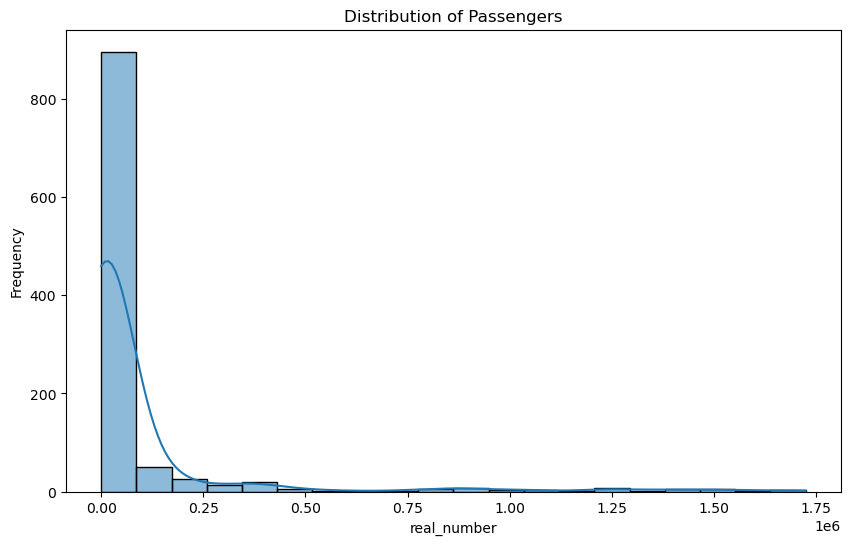

Descriptive Statistics:
        real_number
count  1.062000e+03
mean   9.066601e+04
std    2.592409e+05
min    0.000000e+00
25%    2.825000e+03
50%    8.050000e+03
75%    4.122500e+04
max    1.723900e+06

Measures of Central Tendency:
Mean:
real_number    90666.006591
dtype: float64

Mode:
real_number    0
Name: 0, dtype: int64

Median:
real_number    8050.0
dtype: float64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic descriptive statistics
summary_stats = df_irl_stsc.describe()

# Cauculating ad Display measures of central tendency: mean, mode, median
mean_values = df_irl_stsc.mean()
mode_values = df_irl_stsc.mode().iloc[0]
median_values = df_irl_stsc.median()

# Visualize the distribution of a numerical column 
# This section creates a histogram using Seaborn to visualize the distribution of the 'real_number' column. 
# It sets the figure size, specifies the number of bins, adds a kernel density estimate (KDE).
plt.figure(figsize=(10, 6))
sns.histplot(df_irl_stsc['real_number'], bins=20, kde=True)
plt.title('Distribution of Passengers')
plt.xlabel('real_number')
plt.ylabel('Frequency')
plt.show()

# Display the summary statistics and measures of central tendency
# this part prints the descriptive statistics and measures of central tendency calculated earlier.
# It provides an overview of the data distribution and its central tendencies.
print("Descriptive Statistics:")
print(summary_stats)

print("\nMeasures of Central Tendency:")
print("Mean:")
print(mean_values)

print("\nMode:")
print(mode_values)

print("\nMedian:")
print(median_values)

In [ ]:
# install just in case
# !pip install statsmodels 

In [26]:
import statsmodels.api as sm

# df_irl has pre-summarized totals for each month and direction in the row called All Countries

# Extract the total number of arrivals and departures in July
total_july_arrivals = df_irl[(df_irl['month'] == 7) & (df_irl['Direction'] == 'Arrival') & (df_irl['Country'] == 'All Countries')]['real_number'].iloc[0]
total_july_departures = df_irl[(df_irl['month'] == 7) & (df_irl['Direction'] == 'Departure') & (df_irl['Country'] == 'All Countries')]['real_number'].iloc[0]

# Ensure both totals are non-zero
if total_july_arrivals != 0 and total_july_departures != 0:
    # Calculate proportions
    total_july_traffic = total_july_arrivals + total_july_departures
    prop_arrivals = total_july_arrivals / total_july_traffic
    prop_departures = total_july_departures / total_july_traffic

    # Calculate a 95% confidence interval for the population proportion of arrivals
    conf_interval_arrivals = sm.stats.proportion_confint(total_july_arrivals, total_july_traffic, alpha=0.05)

    # Perform a hypothesis test
    # Null hypothesis: prop_arrivals = prop_departures
    # Alternative hypothesis: prop_arrivals != prop_departures

    # Calculate the test statistic and p-value
    z_stat, p_value = sm.stats.proportions_ztest([total_july_arrivals, total_july_departures], [total_july_traffic, total_july_traffic])

    print("Summary Statistics for Arrivals and Departures in July:")
    print(f"Total Arrivals to Dublin: {total_july_arrivals}")
    print(f"Total Departures from Dublin: {total_july_departures}")
    print(f"Proportion of Arrivals compared to Total Movements: {prop_arrivals:.4f}")
    print(f"95% Confidence Interval for the Population Proportion of Arrivals: {conf_interval_arrivals}")
    print("\nHypothesis Test Results:")
    print(f"Z-statistic: {z_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis. There is enough evidence to suggest that the proportions of arrivals and departures are significantly different.")
    else:
        print("\nFail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the proportions of arrivals and departures.")
else:
    print("\nUnable to perform hypothesis test due to zero arrivals or departures.")


Summary Statistics for Arrivals and Departures in July:
Total Arrivals to Dublin: 1695600
Total Departures from Dublin: 1689300
Proportion of Arrivals compared to Total Movements: 0.5009
95% Confidence Interval for the Population Proportion of Arrivals: (0.5003979505085306, 0.5014632566172338)

Hypothesis Test Results:
Z-statistic: 4.84264491622418
P-value: 1.281221287600666e-06

Reject the null hypothesis. There is enough evidence to suggest that the proportions of arrivals and departures are significantly different.


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming df_hkg is your DataFrame for Hong Kong data

# Filter the dataset for July and 'Arrival' direction
july_arrival_hkg = df_hkg[(df_hkg['month'] == 7) & (df_hkg['Arrival / Departure'] == 'Arrival')]

# Display the count of arrivals in July
count_july_arrivals_hkg = july_arrival_hkg['Total'].sum()
print(f"Number of Arrivals to Hong Kong in July: {count_july_arrivals_hkg}")

# Calculate the total departures from Hong Kong in July
total_departures_hkg = df_hkg[(df_hkg['month'] == 7) & (df_hkg['Arrival / Departure'] == 'Departure')]['Total'].sum()
print(f"Total Departures from Hong Kong in July: {total_departures_hkg}")

# Calculate the proportion of arrivals compared to total movements
total_movements_hkg = df_hkg[df_hkg['month'] == 7]['Total'].sum()
proportion_arrivals_hkg = count_july_arrivals_hkg / total_movements_hkg
print(f"Proportion of Arrivals compared to Total Movements in July: {proportion_arrivals_hkg:.4f}")

# Calculate a 95% confidence interval for the population proportion
conf_interval_hkg = sm.stats.proportion_confint(count_july_arrivals_hkg, total_movements_hkg, alpha=0.05)
print(f"\n95% Confidence Interval for the Population Proportion: {conf_interval_hkg}")

# Perform a hypothesis test to check if the proportion is significantly different from 0.5 (as an example)
# Null hypothesis: The population proportion of arrivals in July is equal to 0.5
# Alternative hypothesis: The population proportion of arrivals in July is not equal to 0.5

# Perform a z-test for proportions
z_stat_hkg, p_value_hkg = sm.stats.proportions_ztest(count_july_arrivals_hkg, total_movements_hkg, value=0.5)

# Display the results of the hypothesis test
print("\nHypothesis Test Results:")
print(f"Z-statistic: {z_stat_hkg}")
print(f"P-value: {p_value_hkg}")

# Check if the null hypothesis is rejected (using a significance level of 0.05)
alpha_hkg = 0.05
if p_value_hkg < alpha_hkg:
    print("\nReject the null hypothesis. There is enough evidence to suggest that the population proportion is not equal to 0.5.")
else:
    print("\nFail to reject the null hypothesis. There is not enough evidence to suggest that the population proportion is different from 0.5.")


## Insight

In [27]:
proportion_july_arrivals_irl= 0.5009
proportion_july_arrivals_hkg= 0.4922

# Display the proportions
print(f"Proportion of Arrivals to Dublin in July: {proportion_july_arrivals_irl:.4f}")
print(f"Proportion of Arrivals to Hong Kong in July: {proportion_july_arrivals_hkg:.4f}")

# Compare the proportions
if proportion_july_arrivals_irl > proportion_july_arrivals_hkg:
    print("\nJuly was more popular in Dublin.")
elif proportion_july_arrivals_irl < proportion_july_arrivals_hkg:
    print("\nJuly was more popular in Hong Kong.")
else:
    print("\nJuly had similar popularity in both Dublin and Hong Kong.")


Proportion of Arrivals to Dublin in July: 0.5009
Proportion of Arrivals to Hong Kong in July: 0.4922

July was more popular in Dublin.


In [28]:
# Making both data set a bit more similar in regards to applying apply parametric and non-parametric 
# inferential statistical techniques.
df_hkg.rename(columns={"Arrival / Departure": "Direction", "Total": "real_number"}, inplace=True)
df_irl = df_irl[(df_irl["real_number"] != 0) & (df_irl['Country'] != 'All Countries')]

In [29]:
df_hkg

,Direction,Hong Kong Residents,Mainland Visitors,Other Visitors,real_number,day,month,year
1460,Arrival,24925,1687,2456,29068,1,1,2023
1461,Departure,14591,1648,4644,20883,1,1,2023
1462,Arrival,28258,1624,1857,31739,2,1,2023
1463,Departure,13367,1422,6713,21502,2,1,2023
1464,Arrival,22993,1663,2459,27115,3,1,2023
...,...,...,...,...,...,...,...,...
2001,Departure,27189,18098,12176,57463,28,9,2023
2002,Arrival,19472,10744,13086,43302,29,9,2023
2003,Departure,34032,16384,9648,60064,29,9,2023
2004,Arrival,19131,10952,11050,41133,30,9,2023


In [30]:
df_irl

,Country,Direction,VALUE,year,month,real_number
2,Ireland (domestic),Arrival,5.7,2023,1,5700
3,Ireland (domestic),Departure,3.7,2023,1,3700
4,Austria,Arrival,8.7,2023,1,8700
5,Austria,Departure,7.9,2023,1,7900
6,Belgium,Arrival,17.4,2023,1,17400
...,...,...,...,...,...,...
1055,Israel,Departure,1.4,2023,9,1400
1056,United Arab Emirates,Arrival,29.1,2023,9,29100
1057,United Arab Emirates,Departure,26.3,2023,9,26300
1058,Other Asian countries (4),Arrival,16.4,2023,9,16400


In [31]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import contingency_tables



#  Comparing means using t-test
def t_test_comparison(df_irl, df_hkg, real_number):
    t_stat, p_value = stats.ttest_ind(data1[variable_of_interest], data2[variable_of_interest])
    return t_stat, p_value

# Example 2: Comparing means across multiple groups using ANOVA
def anova_comparison(data, variable_of_interest, grouping_variable):
    f_stat, p_value = stats.f_oneway(*[group[variable_of_interest] for name, group in data.groupby(grouping_variable)])
    return f_stat, p_value

# Example 3: Comparing distributions using Wilcoxon test
def wilcoxon_comparison(data1, data2, variable_of_interest):
    stat, p_value = stats.ranksums(data1[variable_of_interest], data2[variable_of_interest])
    return stat, p_value

# Example 4: Comparing proportions using Chi-squared test
def chi_squared_comparison(data, variable_of_interest, grouping_variable):
    contingency_table = pd.crosstab(data[variable_of_interest], data[grouping_variable])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    return chi2, p_value

# Example 5: Post hoc analysis after ANOVA
def post_hoc_tukey(data, variable_of_interest, grouping_variable):
    tukey_result = pairwise_tukeyhsd(data[variable_of_interest], data[grouping_variable])
    return tukey_result.summary()

# Example 6: Cramer's V for Chi-squared test
def cramers_v(data, variable_of_interest, grouping_variable):
    contingency_table = pd.crosstab(data[variable_of_interest], data[grouping_variable])
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    min_dim = min(contingency_table.shape) - 1
    v = (phi2 / min_dim)**0.5
    return v

# Use the functions for your specific variables and questions
t_stat, p_value_t = t_test_comparison(df_irl, df_hkg, 'your_variable')
f_stat, p_value_anova = anova_comparison(df_irl, 'your_variable', 'grouping_variable')
stat_wilcoxon, p_value_wilcoxon = wilcoxon_comparison(df_irl, df_hkg, 'your_variable')
chi2_stat, p_value_chi2 = chi_squared_comparison(df_irl, 'your_variable', 'grouping_variable')
tukey_summary = post_hoc_tukey(df_irl, 'your_variable', 'grouping_variable')
cramers_v_value = cramers_v(df_irl, 'your_variable', 'grouping_variable')

# Print or use the results as needed
print("T-test Results:", t_stat, p_value_t)
print("ANOVA Results:", f_stat, p_value_anova)
print("Wilcoxon Results:", stat_wilcoxon, p_value_wilcoxon)
print("Chi-squared Results:", chi2_stat, p_value_chi2)
print("Tukey Post Hoc Results:\n", tukey_summary)
print("Cramer's V Value:", cramers_v_value)


NameError: name 'data1' is not defined

In [32]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd



# Comparing means using t-test
def t_test_comparison(data1, data2, variable_of_interest):
    t_stat, p_value = stats.ttest_ind(data1[variable_of_interest], data2[variable_of_interest])
    return t_stat, p_value

# Comparing means across multiple groups using ANOVA
def anova_comparison(data, variable_of_interest, grouping_variable):
    f_stat, p_value = stats.f_oneway(*[group[variable_of_interest] for name, group in data.groupby(grouping_variable)])
    return f_stat, p_value

# Comparing distributions using Wilcoxon test
def wilcoxon_comparison(data1, data2, variable_of_interest):
    stat, p_value = stats.ranksums(data1[variable_of_interest], data2[variable_of_interest])
    return stat, p_value

# Comparing proportions using Chi-squared test
def chi_squared_comparison(data, variable_of_interest, grouping_variable):
    contingency_table = pd.crosstab(data[variable_of_interest], data[grouping_variable])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    return chi2, p_value

# Post hoc analysis after ANOVA
def post_hoc_tukey(data, variable_of_interest, grouping_variable):
    tukey_result = pairwise_tukeyhsd(data[variable_of_interest], data[grouping_variable])
    return tukey_result.summary()

# Cramer's V for Chi-squared test
def cramers_v(data, variable_of_interest, grouping_variable):
    contingency_table = pd.crosstab(data[variable_of_interest], data[grouping_variable])
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    min_dim = min(contingency_table.shape) - 1
    v = (phi2 / min_dim)**0.5
    return v

# Using the functions above for my variables and questions
t_stat, p_value_t = t_test_comparison(df_irl, df_hkg, 'real_number')
f_stat, p_value_anova = anova_comparison(df_irl, 'real_number', 'Direction')
stat_wilcoxon, p_value_wilcoxon = wilcoxon_comparison(df_irl, df_hkg, 'real_number')
chi2_stat, p_value_chi2 = chi_squared_comparison(df_irl, 'real_number', 'Direction')
tukey_summary = post_hoc_tukey(df_irl, 'real_number', 'Direction')
cramers_v_value = cramers_v(df_irl, 'real_number', 'Direction')

# Print or use the results as needed
print("T-test Results:", t_stat, p_value_t)
print("ANOVA Results:", f_stat, p_value_anova)
print("Wilcoxon Results:", stat_wilcoxon, p_value_wilcoxon)
print("Chi-squared Results:", chi2_stat, p_value_chi2)
print("Tukey Post Hoc Results:\n", tukey_summary)
print("Cramer's V Value:", cramers_v_value)


T-test Results: 4.586912583013366 4.894937671746038e-06
ANOVA Results: 0.0017636407821083361 0.9665117100047546
Wilcoxon Results: -13.292334874092797 2.564490440478335e-40
Chi-squared Results: 464.2253426387193 0.5145016330142148
Tukey Post Hoc Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2  meandiff p-adj    lower      upper   reject
-------------------------------------------------------------
Arrival Departure 588.9495 0.9665 -26935.815 28113.714  False
-------------------------------------------------------------
Cramer's V Value: 0.7283839981287102


## Insight

    -> t-test and Wilcoxon test suggest significant differences in the 'real_number' variable between Ireland and Hong Kong. However, the ANOVA, Chi-squared test, and Tukey post hoc analysis indicate no significant differences in means or associations among groups. Cramer's V suggests a strong association between the analysed categorical variables.
    -> The challenges faced involved the need to reconfigure the datasets to achieve maximum alignment without sacrificing data. Additionally, determining the appropriate integration of the selected datasets into the tests posed a significant difficulty.

In [35]:
df_irl.dtypes

Country         object
Direction       object
VALUE          float64
year             int64
month            int64
real_number      int64
dtype: object

# Machine Leanring

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Identify categorical columns
categorical_cols = df_irl.select_dtypes(include=["object"]).columns

# One-hot encoding for the entire dataset
df_irl_encoded = pd.get_dummies(df_irl, columns=categorical_cols)

# Separate features and target for the entire dataset
X = df_irl_encoded.drop("real_number", axis=1)
y = df_irl_encoded["real_number"]

# Model
model = RandomForestRegressor()

# Parameters grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring="neg_mean_squared_error")
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

# Prepare the Features for January 2024
X_jan_2024 = df_irl[df_irl["month"] == 1].drop(["real_number"], axis=1)

# One-hot encode the features for January 2024 using the same encoding as the entire dataset
X_jan_2024_encoded = pd.get_dummies(X_jan_2024, columns=categorical_cols).reindex(columns=X.columns, fill_value=0)

# Predict for January 2024 using the trained model
passenger_predictions_jan_2024 = best_model.predict(X_jan_2024_encoded)

# Aggregate predictions (e.g., using mean or median)
final_prediction = passenger_predictions_jan_2024.mean()  # or .median()

# Display the final prediction
print("Predicted number of passengers in January 2024:", final_prediction)


Predicted number of passengers in January 2024: 60894.48741837059


In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# Identify categorical columns
categorical_cols = df_irl.select_dtypes(include=["object"]).columns

# One-hot encoding for the entire dataset
df_irl_encoded = pd.get_dummies(df_irl, columns=categorical_cols)

# Separate features and target for the entire dataset
X = df_irl_encoded.drop("real_number", axis=1)
y = df_irl_encoded["real_number"]

# Model
model = GradientBoostingRegressor()

# Parameters grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring="neg_mean_squared_error")
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

# Prepare the Features for January 2024
X_jan_2024 = df_irl[df_irl["month"] == 1].drop(["real_number"], axis=1)

# One-hot encode the features for January 2024 using the same encoding as the entire dataset
X_jan_2024_encoded = pd.get_dummies(X_jan_2024, columns=categorical_cols).reindex(columns=X.columns, fill_value=0)

# Predict for January 2024 using the trained model
passenger_predictions_jan_2024 = best_model.predict(X_jan_2024_encoded)

# Aggregate predictions (e.g., using mean or median)
final_prediction = passenger_predictions_jan_2024.mean()  # or .median()

# Display the final prediction
print("Predicted number of passengers in January 2024:", final_prediction)

Predicted number of passengers in January 2024: 60927.329029345965


## Sentimental analysis

In [39]:
#pip install textblob

In [42]:
from textblob import TextBlob
df_dublin_reviews = pd.read_csv('df_dublin_reviews.csv')
df_hkg_reviews = pd.read_csv('df_hkg_reviews.csv')


# Function to apply sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply to Dublin reviews
df_dublin_reviews['polarity'], df_dublin_reviews['subjectivity'] = zip(*df_dublin_reviews['text'].apply(analyze_sentiment))

# Apply to Hong Kong reviews
df_hkg_reviews['polarity'], df_hkg_reviews['subjectivity'] = zip(*df_hkg_reviews['text'].apply(analyze_sentiment))

In [46]:
# Compute average polarity and subjectivity for Dublin reviews
avg_polarity_dublin = df_dublin_reviews['polarity'].mean()
avg_subjectivity_dublin = df_dublin_reviews['subjectivity'].mean()

# Compute average polarity and subjectivity for Hong Kong reviews
avg_polarity_hkg = df_hkg_reviews['polarity'].mean()
avg_subjectivity_hkg = df_hkg_reviews['subjectivity'].mean()

print("Average Polarity - Dublin Reviews:", avg_polarity_dublin)
print("Average Subjectivity - Dublin Reviews:", avg_subjectivity_dublin)
print("Average Polarity - Hong Kong Reviews:", avg_polarity_hkg)
print("Average Subjectivity - Hong Kong Reviews:", avg_subjectivity_hkg)

Average Polarity - Dublin Reviews: 0.09626039999061166
Average Subjectivity - Dublin Reviews: 0.39902951409257004
Average Polarity - Hong Kong Reviews: 0.07885395274881364
Average Subjectivity - Hong Kong Reviews: 0.30332676705077655


In [47]:
# Dublin - Most positive and negative reviews
most_positive_review_dublin = df_dublin_reviews.loc[df_dublin_reviews['polarity'].idxmax()]['text']
most_negative_review_dublin = df_dublin_reviews.loc[df_dublin_reviews['polarity'].idxmin()]['text']

# Hong Kong - Most positive and negative reviews
most_positive_review_hkg = df_hkg_reviews.loc[df_hkg_reviews['polarity'].idxmax()]['text']
most_negative_review_hkg = df_hkg_reviews.loc[df_hkg_reviews['polarity'].idxmin()]['text']

print("Most Positive Review - Dublin:", most_positive_review_dublin)
print("Most Negative Review - Dublin:", most_negative_review_dublin)
print("Most Positive Review - Hong Kong:", most_positive_review_hkg)
print("Most Negative Review - Hong Kong:", most_negative_review_hkg)


Most Positive Review - Dublin: Best Value for Money at the Dublin airport? My vote goes to Boots, all this for 9.98. 
Most Negative Review - Dublin: Ryanair sick of drones at Dublin Airport. 
Most Positive Review - Hong Kong: Beautiful Hong Kong. Taken today along Chep Lap Kok Airport. 
Most Negative Review - Hong Kong: Do I need to PCR or Rapid test if I'm transiting through Hong Kong Airport? I'm travelling from Australia (no tests required to leave) to Amsterdam (No tests requited to enter) through a 3 hour layover at Hong Kong as a fully vaccinated traveller - I can't seem to find out if I need a PCR or Rapid test in order to transit through Hong Kong.   


This website: [https://mainlymiles.com/2022/05/29/hong-kong-scraps-covid-19-testing-for-transit-passengers-from-1-june/](https://mainlymiles.com/2022/05/29/hong-kong-scraps-covid-19-testing-for-transit-passengers-from-1-june/) seems to say I don't  


However this website: [https://www.coronavirus.gov.hk/eng/inbound-travel.html#

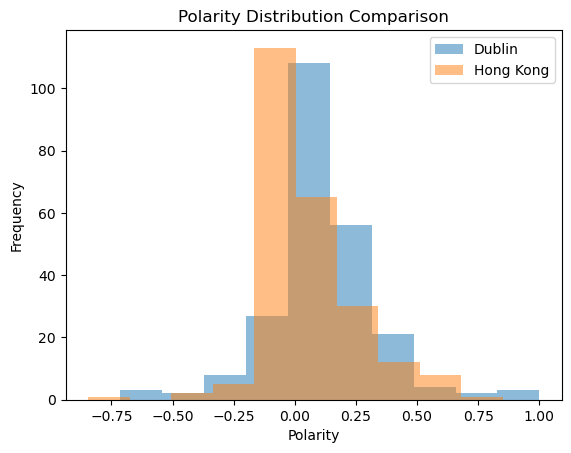

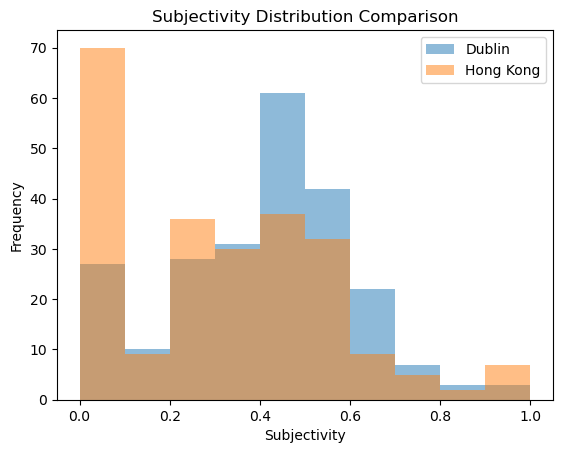

In [48]:
import matplotlib.pyplot as plt

# Polarity distribution comparison
plt.hist(df_dublin_reviews['polarity'], alpha=0.5, label='Dublin')
plt.hist(df_hkg_reviews['polarity'], alpha=0.5, label='Hong Kong')
plt.title('Polarity Distribution Comparison')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Subjectivity distribution comparison
plt.hist(df_dublin_reviews['subjectivity'], alpha=0.5, label='Dublin')
plt.hist(df_hkg_reviews['subjectivity'], alpha=0.5, label='Hong Kong')
plt.title('Subjectivity Distribution Comparison')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Preprocessing and Feature Extraction

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer for text data
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data from both datasets
X_dublin = vectorizer.fit_transform(df_dublin_reviews['text'])
X_hkg = vectorizer.fit_transform(df_hkg_reviews['text'])

#### Define Target Variables

In [51]:
# Assuming a simple binary classification where polarity > 0 is 'positive' (label 1) and polarity <= 0 is 'negative' (label 0)
y_dublin = (df_dublin_reviews['polarity'] > 0).astype(int)
y_hkg = (df_hkg_reviews['polarity'] > 0).astype(int)

#### Dimensionality Reduction

In [52]:
from sklearn.decomposition import TruncatedSVD

# Dimensionality reduction for Dublin reviews
svd_dublin = TruncatedSVD(n_components=100)
X_dublin_reduced = svd_dublin.fit_transform(X_dublin)

# Dimensionality reduction for Hong Kong reviews
svd_hkg = TruncatedSVD(n_components=100)
X_hkg_reduced = svd_hkg.fit_transform(X_hkg)

#### Model Training and Cross-Validation

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier()

# Cross-validation for Dublin reviews
scores_dublin = cross_val_score(classifier, X_dublin_reduced, y_dublin, cv=5)
print(f"Dublin Reviews - Cross-validated accuracy: {scores_dublin.mean()}")

# Cross-validation for Hong Kong reviews
scores_hkg = cross_val_score(classifier, X_hkg_reduced, y_hkg, cv=5)
print(f"Hong Kong Reviews - Cross-validated accuracy: {scores_hkg.mean()}")

Dublin Reviews - Cross-validated accuracy: 0.679463459759482
Hong Kong Reviews - Cross-validated accuracy: 0.611790780141844


#### Model Evaluation

In [54]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_dublin, X_test_dublin, y_train_dublin, y_test_dublin = train_test_split(X_dublin_reduced, y_dublin, test_size=0.2, random_state=42)
X_train_hkg, X_test_hkg, y_train_hkg, y_test_hkg = train_test_split(X_hkg_reduced, y_hkg, test_size=0.2, random_state=42)

# Train and evaluate for Dublin reviews
classifier.fit(X_train_dublin, y_train_dublin)
predictions_dublin = classifier.predict(X_test_dublin)
print(f"Dublin Reviews - Classification Report:\n{classification_report(y_test_dublin, predictions_dublin)}")

# Train and evaluate for Hong Kong reviews
classifier.fit(X_train_hkg, y_train_hkg)
predictions_hkg = classifier.predict(X_test_hkg)
print(f"Hong Kong Reviews - Classification Report:\n{classification_report(y_test_hkg, predictions_hkg)}")

Dublin Reviews - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.79      0.97      0.87        35

    accuracy                           0.79        47
   macro avg       0.77      0.61      0.62        47
weighted avg       0.78      0.79      0.74        47

Hong Kong Reviews - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.59      0.64        29
           1       0.50      0.63      0.56        19

    accuracy                           0.60        48
   macro avg       0.60      0.61      0.60        48
weighted avg       0.63      0.60      0.61        48



# Programming

### Testing
    - Unit Testing
    - Integration Testing

In [75]:
from unittest.mock import patch, MagicMock
import unittest
%time
class TestRevwReddit(unittest.TestCase):

    @patch('praw.Reddit')  # Mock the Reddit object
    def test_revw_reddit(self, mock_reddit):
        # Create a mock submission object
        mock_submission = MagicMock()
        mock_submission.title = 'Test Title'
        mock_submission.selftext = 'Test Text'

        # Mock the search method to return a list of mock submissions
        mock_reddit.return_value.subreddit.return_value.search.return_value = [mock_submission]

        # Call the function
        df = revw_reddit('test_subreddit', 'test_query')

        # Assertions
        self.assertEqual(len(df), 1)
        self.assertEqual(df.iloc[0]['title'], 'Test Title')
        self.assertEqual(df.iloc[0]['text'], 'Test Text')

# Running the test
unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 15 µs
